In [ ]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


**Part 1 – Data Preparation**

Load the dataset.

Select only numerical features relevant to customer behavior.

Handle missing values.

Standardize the data.

In [ ]:
import pandas as pd
df = pd.read_csv("marketing_campaign.csv", sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
features = [
    'Income', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth',
    'Kidhome', 'Teenhome'
]
data = df[features]

In [ ]:

data = data.fillna(data.median())

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

**Part 2 – PCA Implementation**

Apply PCA on the standardized dataset.

Plot the explained variance ratio.

Determine:

How many principal components are needed to retain at least 90% of total variance?

Reduce the dataset to those components.

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

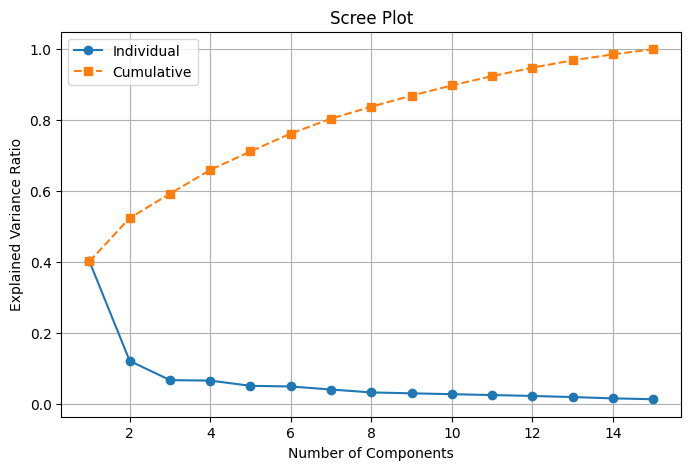

In [ ]:
explained = pca.explained_variance_ratio_
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained)+1), explained, 'o-', label='Individual')
plt.plot(range(1, len(explained)+1), np.cumsum(explained), 's--', label='Cumulative')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
cum_var = np.cumsum(explained)
n_components_90 = np.argmax(cum_var >= 0.90) + 1
print("Number of components to retain 90% variance:", n_components_90)

Number of components to retain 90% variance: 11


In [ ]:
from sklearn.decomposition import PCA
pca_90 = PCA(n_components=n_components_90)
X_reduced = pca_90.fit_transform(X_scaled)

print("Shape of reduced dataset:", X_reduced.shape)

Shape of reduced dataset: (2240, 11)


**Part 3 – Interpretation**

Identify:

Which original features contribute most to PC1?
Which features dominate PC2?

Explain what PC1 and PC2 represent in business terms.

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(features))],
    index=features
)

print(loadings[['PC1','PC2']].sort_values(by='PC1', ascending=False))

                          PC1       PC2
NumCatalogPurchases  0.331848  0.018143
MntMeatProducts      0.325111 -0.131546
MntWines             0.304720  0.203163
NumStorePurchases    0.302855  0.198564
Income               0.302037  0.041115
MntFishProducts      0.297772 -0.132844
MntFruits            0.288512 -0.116031
MntSweetProducts     0.287293 -0.092646
MntGoldProds         0.235999  0.149364
NumWebPurchases      0.221892  0.423463
Recency              0.005830 -0.001890
NumDealsPurchases   -0.053020  0.564970
Teenhome            -0.054525  0.511337
NumWebVisitsMonth   -0.265046  0.278778
Kidhome             -0.270063 -0.016503


**Part 4 – Practical Application**

Visualize customers in 2D PCA space.

Now apply K-Means clustering on:

Original dataset

PCA-reduced dataset

Compare:

Silhouette score

Computation time

Cluster separation quality

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 4
kmeans_orig = KMeans(n_clusters=k, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)
sil_orig = silhouette_score(X_scaled, labels_orig)
print("Original Data - Silhouette Score:", sil_orig)

Original Data - Silhouette Score: 0.2401044070049777


In [ ]:
kmeans_pca = KMeans(n_clusters=k, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_reduced)
sil_pca = silhouette_score(X_reduced, labels_pca)
print("PCA-Reduced Data - Silhouette Score:", sil_pca)

PCA-Reduced Data - Silhouette Score: 0.18154113491856957


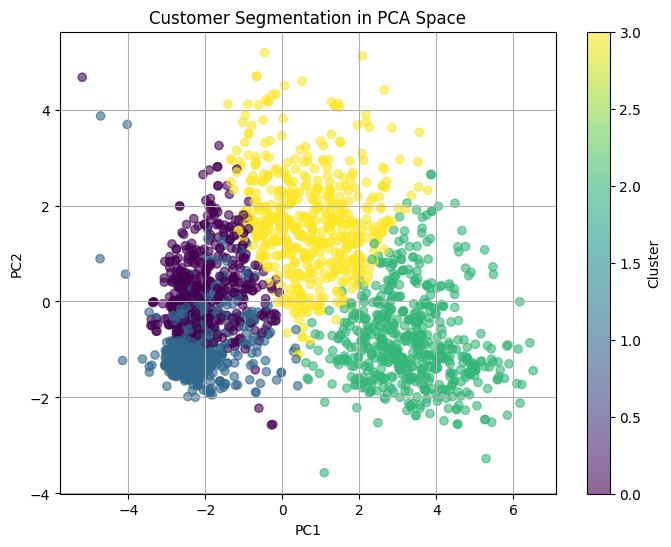

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels_pca, cmap='viridis', alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Segmentation in PCA Space")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

comparison = pd.DataFrame({
    "Dataset": ["Original", "PCA-Reduced"],
    "Silhouette Score": [sil_orig, sil_pca],
})
print(comparison)

       Dataset  Silhouette Score
0     Original          0.240104
1  PCA-Reduced          0.181541
